In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_test = pd.read_csv('data/blr_test_controls_metrics_17K.csv')

In [3]:
df_transfer_opn = pd.read_csv('data/blr_transfer_opn_metrics_22K.csv')

In [4]:
df_transfer_sz = pd.read_csv('data/blr_transfer_umich_cobre_metrics_22K.csv')

In [5]:
sns.set_theme(style="whitegrid", palette="muted")

(-2.5, 2.5)

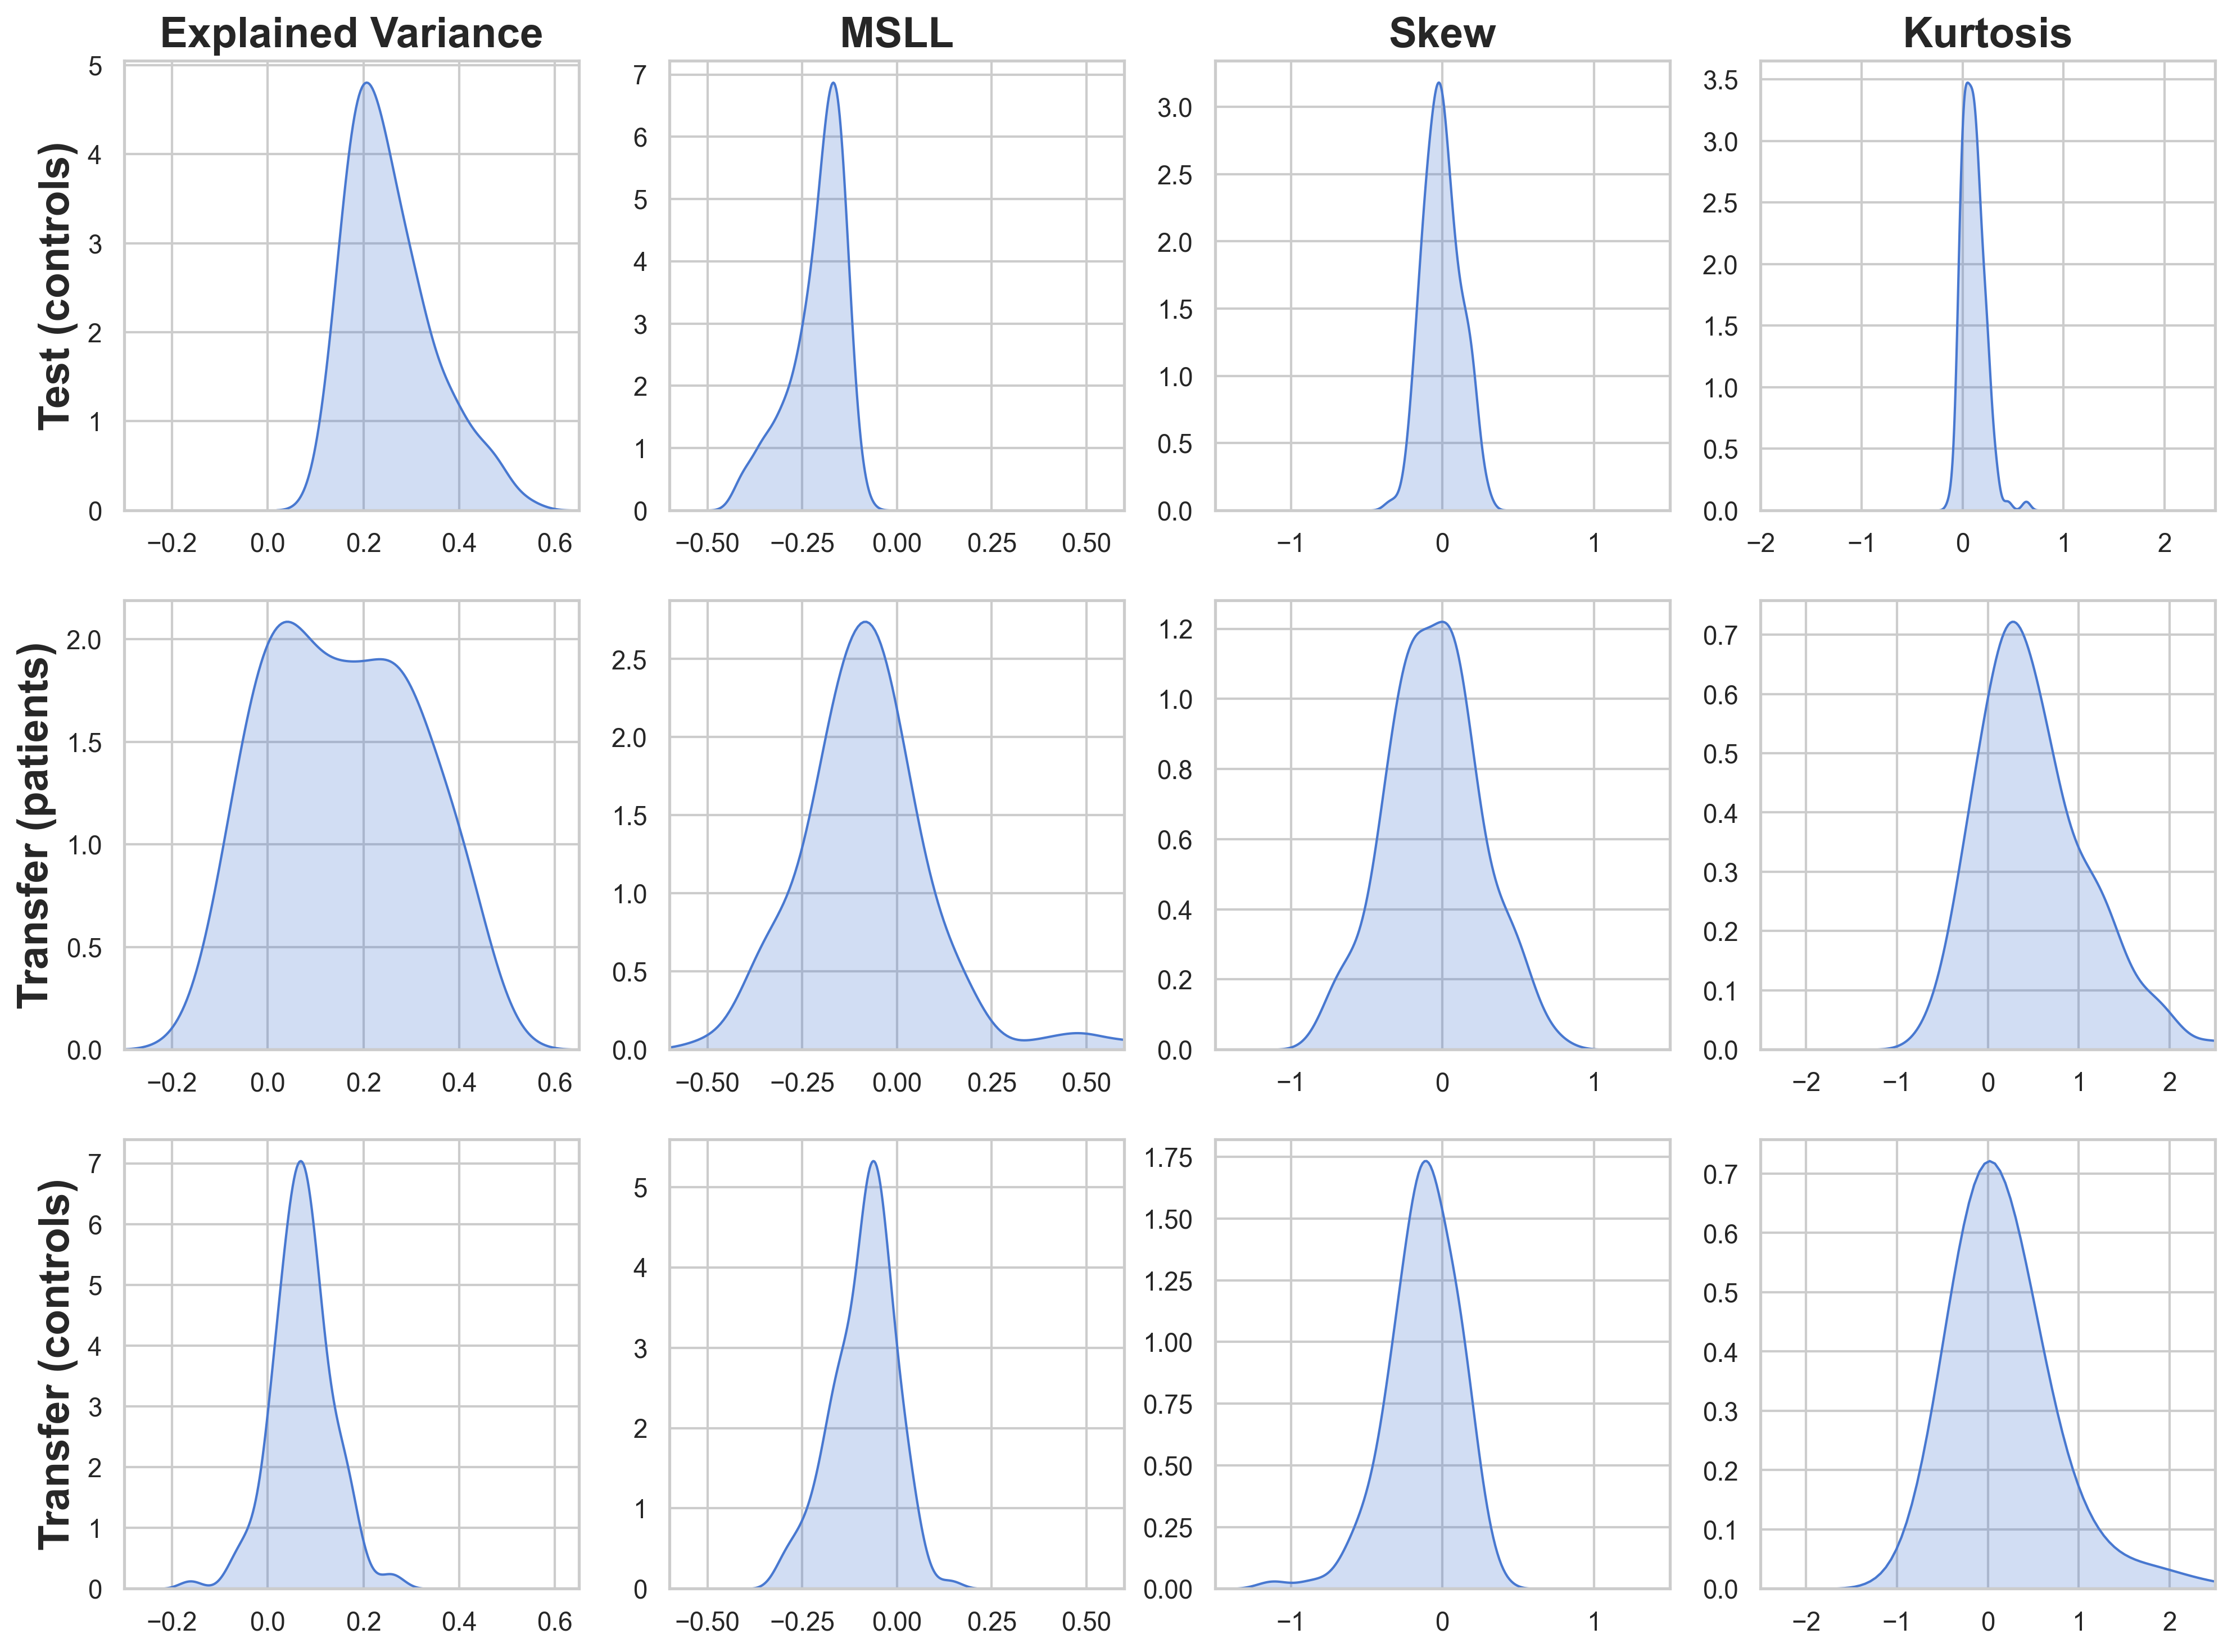

In [6]:
# Full sample evaluation metrics (Figure 3, top row)
fig, axs = plt.subplots(3, 4,figsize=(16,12), dpi=300)
sns.kdeplot(x=df_test['EV'], fill=True, ax=axs[0,0],legend=False);
axs[0,0].set_title('Explained Variance', fontsize=18, fontweight='bold')
axs[0,0].set_ylabel('Test (controls)', fontsize=18, fontweight='bold')
axs[0,0].set_xlabel('')
axs[0,0].set_xlim(-0.3,0.65)
sns.kdeplot(x=df_test['MSLL'], fill=True, ax=axs[0,1],legend=False);
axs[0,1].set_title('MSLL', fontsize=18, fontweight='bold')
axs[0,1].set_ylabel('')
axs[0,1].set_xlabel('')
axs[0,1].set_xlim(-0.6,0.6)
sns.kdeplot(x=df_test['Skew'], fill=True, ax=axs[0,2],legend=False);
axs[0,2].set_title('Skew', fontsize=18, fontweight='bold')
axs[0,2].set_ylabel('')
axs[0,2].set_xlabel('')
axs[0,2].set_xlim(-1.5,1.5)
sns.kdeplot(x=df_test['Kurtosis'], fill=True, ax=axs[0,3]);
axs[0,3].set_title('Kurtosis', fontsize=18, fontweight='bold')
axs[0,3].set_ylabel('')
axs[0,3].set_xlabel('')
axs[0,3].set_xlim(-2,2.5)
sns.kdeplot(x=df_transfer_sz['EV'], fill=True, ax=axs[1,0],legend=False);
axs[1,0].set_ylabel('Transfer (patients)', fontsize=18, fontweight='bold')
axs[1,0].set_xlabel('')
axs[1,0].set_xlim(-0.3,0.65)
sns.kdeplot(x=df_transfer_sz['MSLL'], fill=True, ax=axs[1,1],legend=False);
axs[1,1].set_ylabel('')
axs[1,1].set_xlabel('')
axs[1,1].set_xlim(-0.6,0.6)
sns.kdeplot(x=df_transfer_sz['Skew'], fill=True, ax=axs[1,2],legend=False);
axs[1,2].set_ylabel('')
axs[1,2].set_xlabel('')
axs[1,2].set_xlim(-1.5,1.5)
sns.kdeplot(x=df_transfer_sz['Kurtosis'], fill=True, ax=axs[1,3],legend=False);
axs[1,3].set_ylabel('')
axs[1,3].set_xlabel('')
axs[1,3].set_xlim(-2.5,2.5)
sns.kdeplot(x=df_transfer_opn['EV'], fill=True, ax=axs[2,0],legend=False);
axs[2,0].set_ylabel('Transfer (controls)', fontsize=18, fontweight='bold')
axs[2,0].set_xlabel('')
axs[2,0].set_xlim(-0.3,0.65)
sns.kdeplot(x=df_transfer_opn['MSLL'], fill=True, ax=axs[2,1],legend=False);
axs[2,1].set_ylabel('')
axs[2,1].set_xlabel('')
axs[2,1].set_xlim(-0.6,0.6)
sns.kdeplot(x=df_transfer_opn['Skew'], fill=True, ax=axs[2,2],legend=False);
axs[2,2].set_ylabel('')
axs[2,2].set_xlabel('')
axs[2,2].set_xlim(-1.5,1.5)
sns.kdeplot(x=df_transfer_opn['Kurtosis'], fill=True, ax=axs[2,3],legend=False);
axs[2,3].set_ylabel('')
axs[2,3].set_xlabel('')
axs[2,3].set_xlim(-2.5,2.5)

In [11]:
cmap = sns.cubehelix_palette(as_cmap=True, start=.5, rot=-.75, light=.9)
sns.set_theme(style="whitegrid", font_scale=1.3)

In [8]:
yeo_cols = ['Vis-A', 'Vis-B', 'SM-A', 'SM-B', 'DorsAttn-A', 'DorsAttn-B', 'SalVentAttn-A', 'SalVentAttn-B',
'Limbic-B', 'Limbic-A', 'Cont-A', 'Cont-B', 'Cont-C', 'Default-A', 'Default-B', 'Default-C', 'TempPar']


## Test controls explained variance viz

In [9]:
test_ev_arr = df_test['EV'].to_numpy()

In [10]:
restored = np.zeros((17,17))
restored[np.triu_indices(17,k=1)] = test_ev_arr

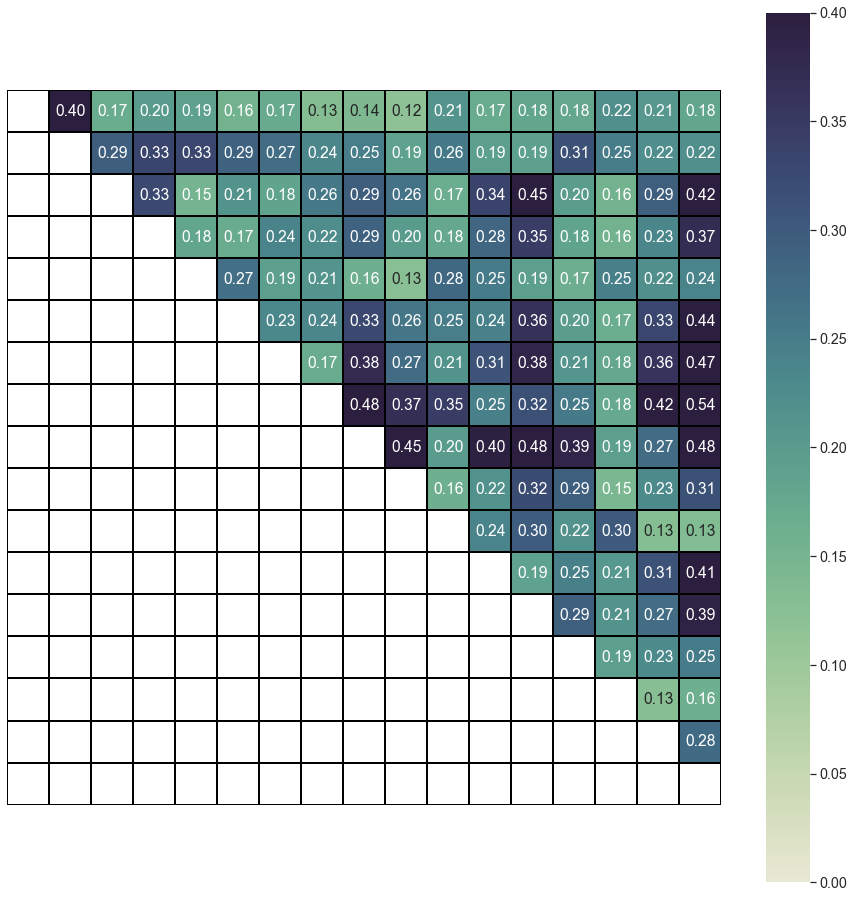

In [12]:
fig, ax = plt.subplots(figsize=[16,16])
axr = sns.heatmap(restored, annot=True, ax=ax, linewidth=0.1, linecolor='black', square=True, mask=(restored==0), fmt="0.2f", cmap=cmap, xticklabels=False, yticklabels=False, vmin=0, vmax=0.4);

In [13]:
restored += restored.T # uncomment this line if you want the symmetric matrix, if you want the upper triangle only, leave this line commented out

In [14]:
restored2 = pd.DataFrame(data=restored, index=yeo_cols, columns=yeo_cols)

/opt/anaconda3/envs/braincharts/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


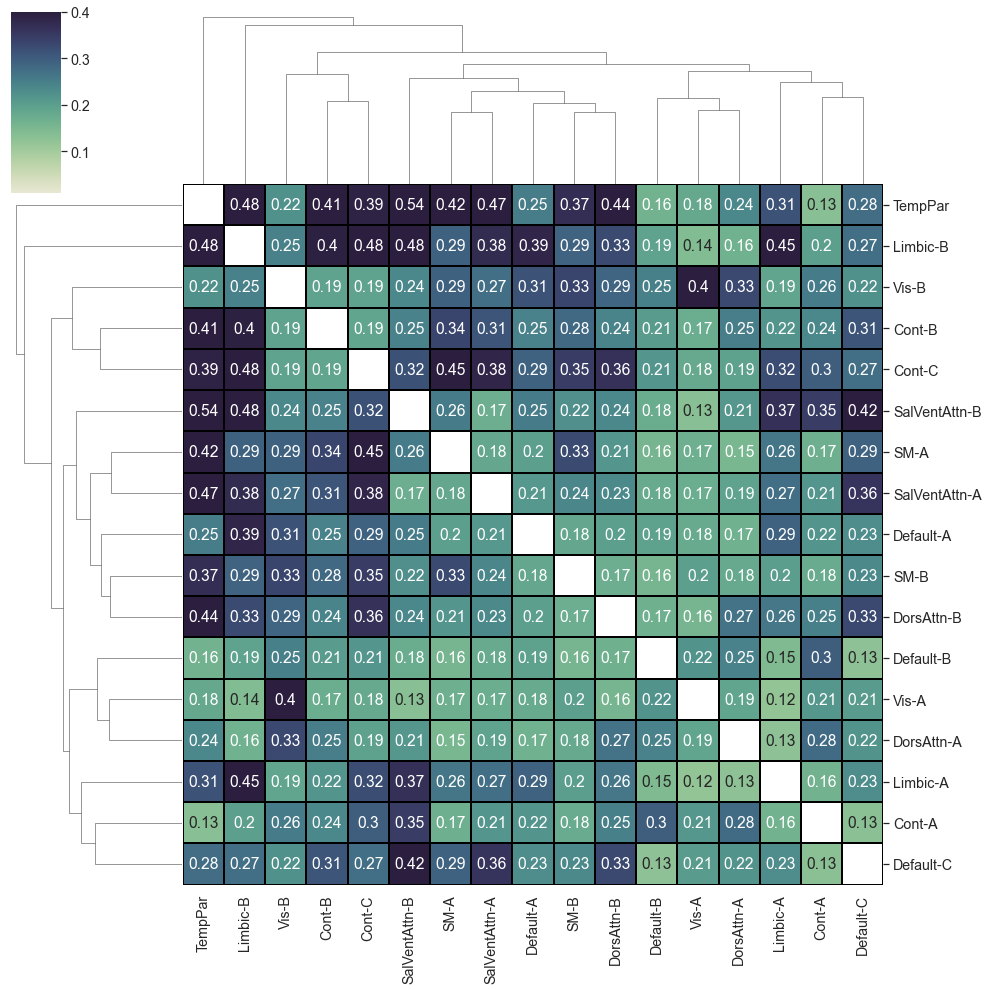

In [15]:
sns.clustermap(restored2, figsize=[14,14], linewidth=0.1, linecolor='black', mask=(restored2==0), vmin=0.01, vmax=0.4, annot=True, cmap=cmap);

## Test transfer SZ explained variance viz

In [21]:
test_ev_arr2 = df_transfer_sz['EV'].to_numpy()

In [22]:
restored2 = np.zeros((17,17))
restored2[np.triu_indices(17,k=1)] = test_ev_arr2

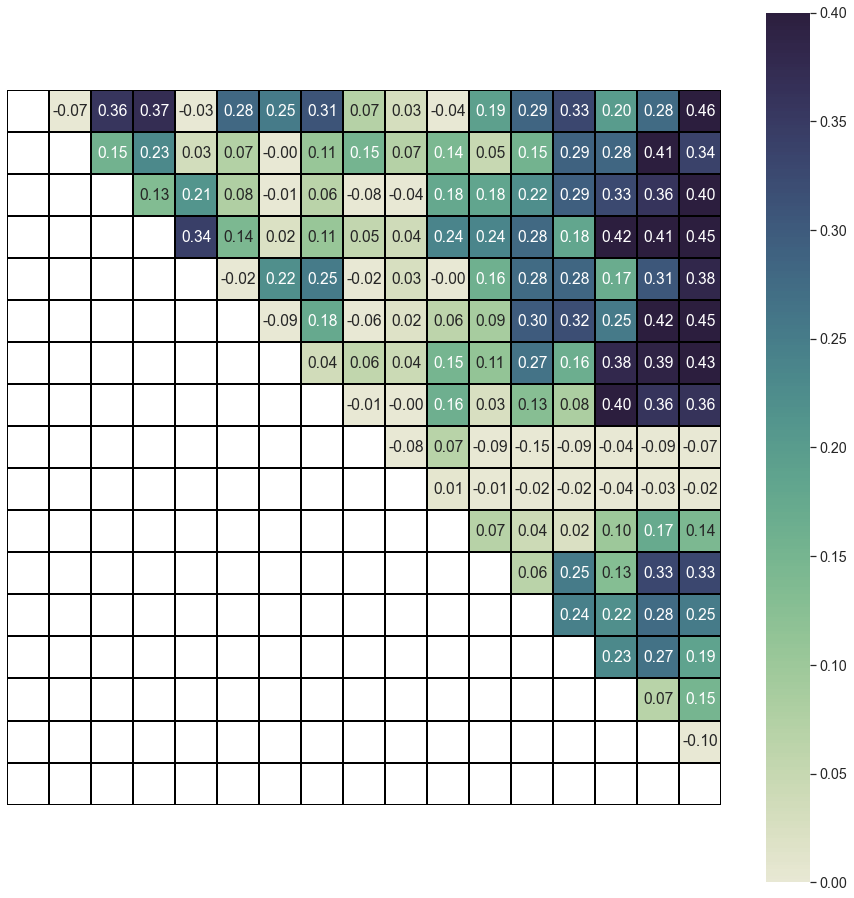

In [20]:
fig, ax = plt.subplots(figsize=[16,16])
axr = sns.heatmap(restored2, annot=True, fmt="0.2f", ax=ax,  linewidth=0.1, linecolor='black', square=True, mask=(restored2==0), cmap=cmap, xticklabels=False, yticklabels=False, vmin=0, vmax=0.4);

In [23]:
df_transfer_sz = df_transfer_sz.round({"EV":2}) 

In [24]:
test_ev_arr2 = df_transfer_sz['EV'].to_numpy()

In [25]:
restored2 = np.zeros((17,17))
restored2[np.triu_indices(17,k=1)] = test_ev_arr2
restored2 += restored2.T # uncomment this line if you want the symmetric matrix, if you want the upper triangle only, leave this line commented out

In [26]:
restored22 = pd.DataFrame(data=restored2, index=yeo_cols, columns=yeo_cols)

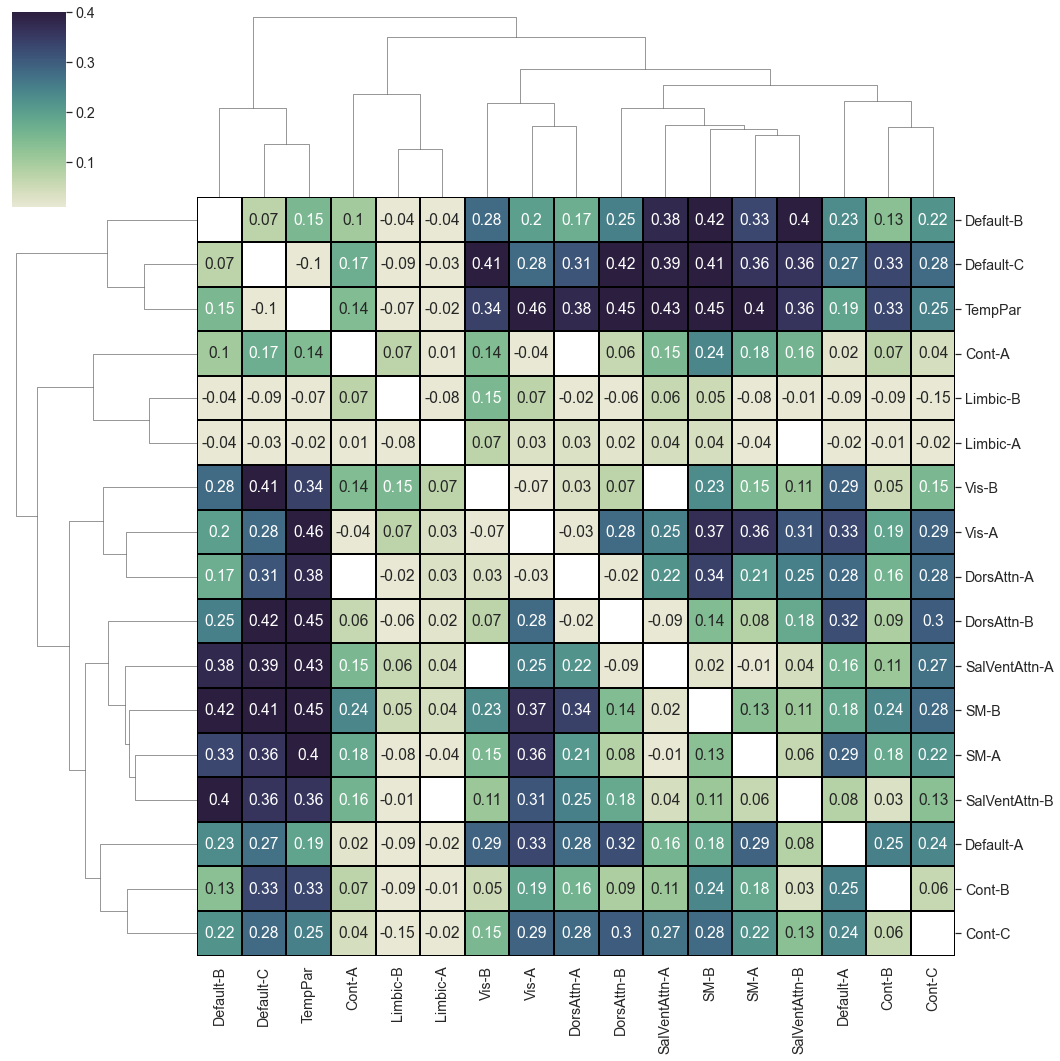

In [28]:
sns.clustermap(restored22, figsize=[15,15], linewidth=0.1, linecolor='black', mask=(restored22==0), vmin=0.01, vmax=0.4, annot=True, cmap=cmap);

In [29]:
test_ev_arr3 = df_transfer_opn['EV'].to_numpy()

In [30]:
restored3 = np.zeros((17,17))
restored3[np.triu_indices(17,k=1)] = test_ev_arr3

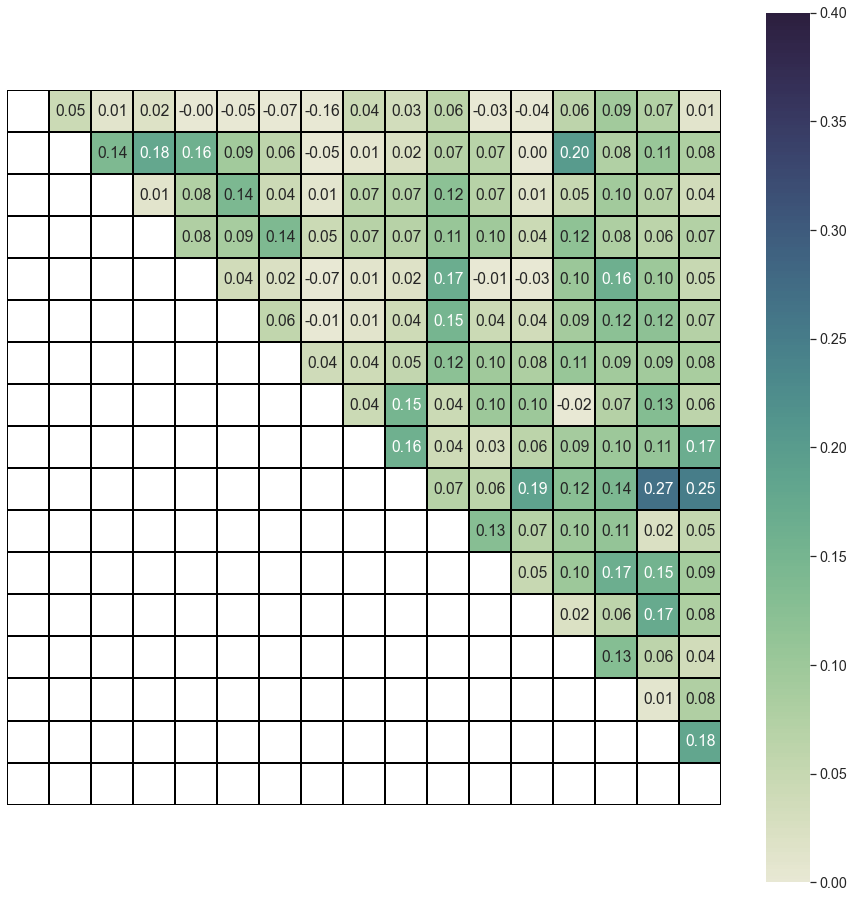

In [31]:
fig, ax = plt.subplots(figsize=[16,16])
axr = sns.heatmap(restored3, annot=True, fmt="0.2f", ax=ax,  linewidth=0.1, linecolor='black', square=True, mask=(restored3==0), cmap=cmap, xticklabels=False, yticklabels=False, vmin=0, vmax=0.4);

In [32]:
df_transfer_opn = df_transfer_opn.round({"EV":2}) 

In [33]:
test_ev_arr3 = df_transfer_opn['EV'].to_numpy()

In [34]:
restored3 = np.zeros((17,17))
restored3[np.triu_indices(17,k=1)] = test_ev_arr3
restored3 += restored3.T # uncomment this line if you want the symmetric matrix, if you want the upper triangle only, leave this line commented out

In [35]:
restored32 = pd.DataFrame(data=restored3, index=yeo_cols, columns=yeo_cols)

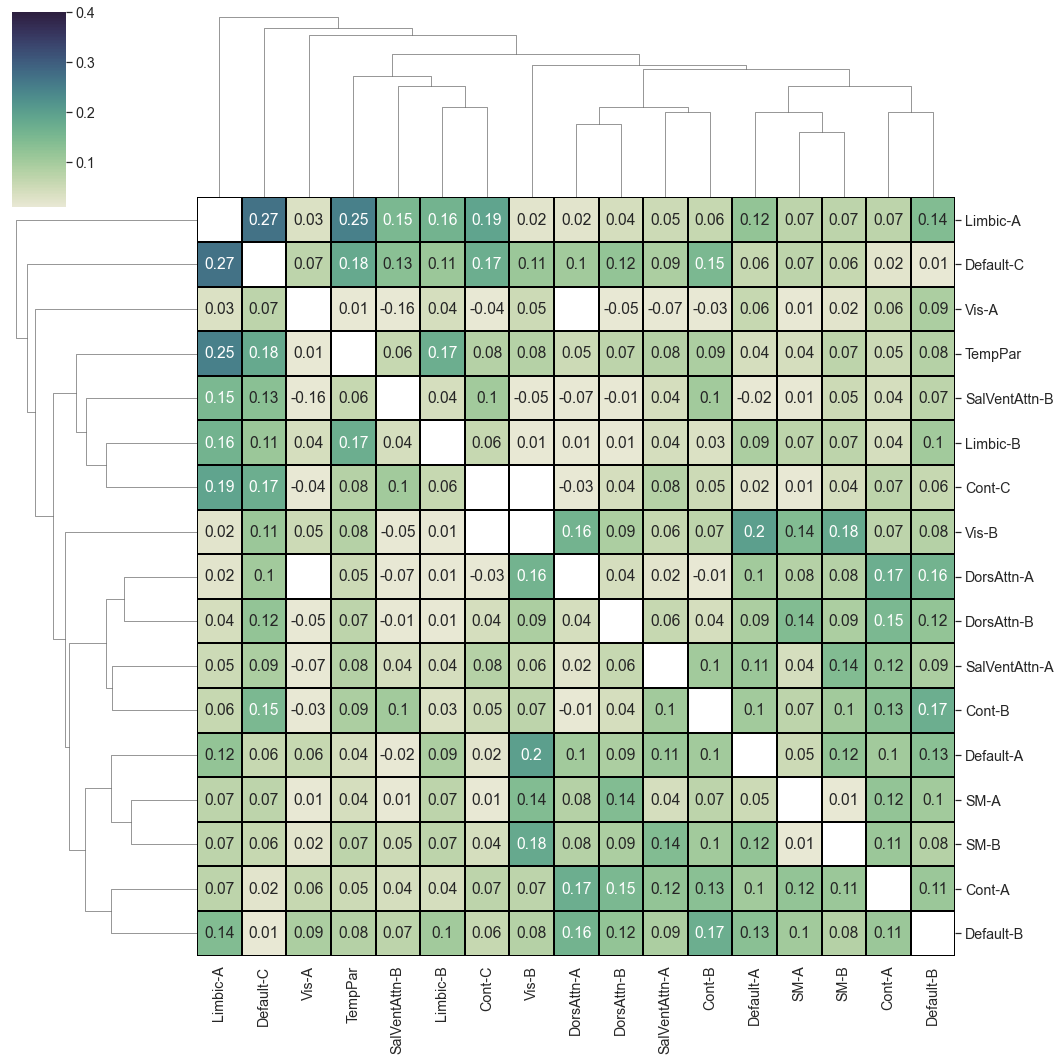

In [36]:
sns.clustermap(restored32, figsize=[15,15], linewidth=0.1, linecolor='black', mask=(restored32==0), vmin=0.01, vmax=0.4, annot=True, cmap=cmap);